In [12]:
from tqdm import tqdm
import scipy.stats as sts
import scipy as sc
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

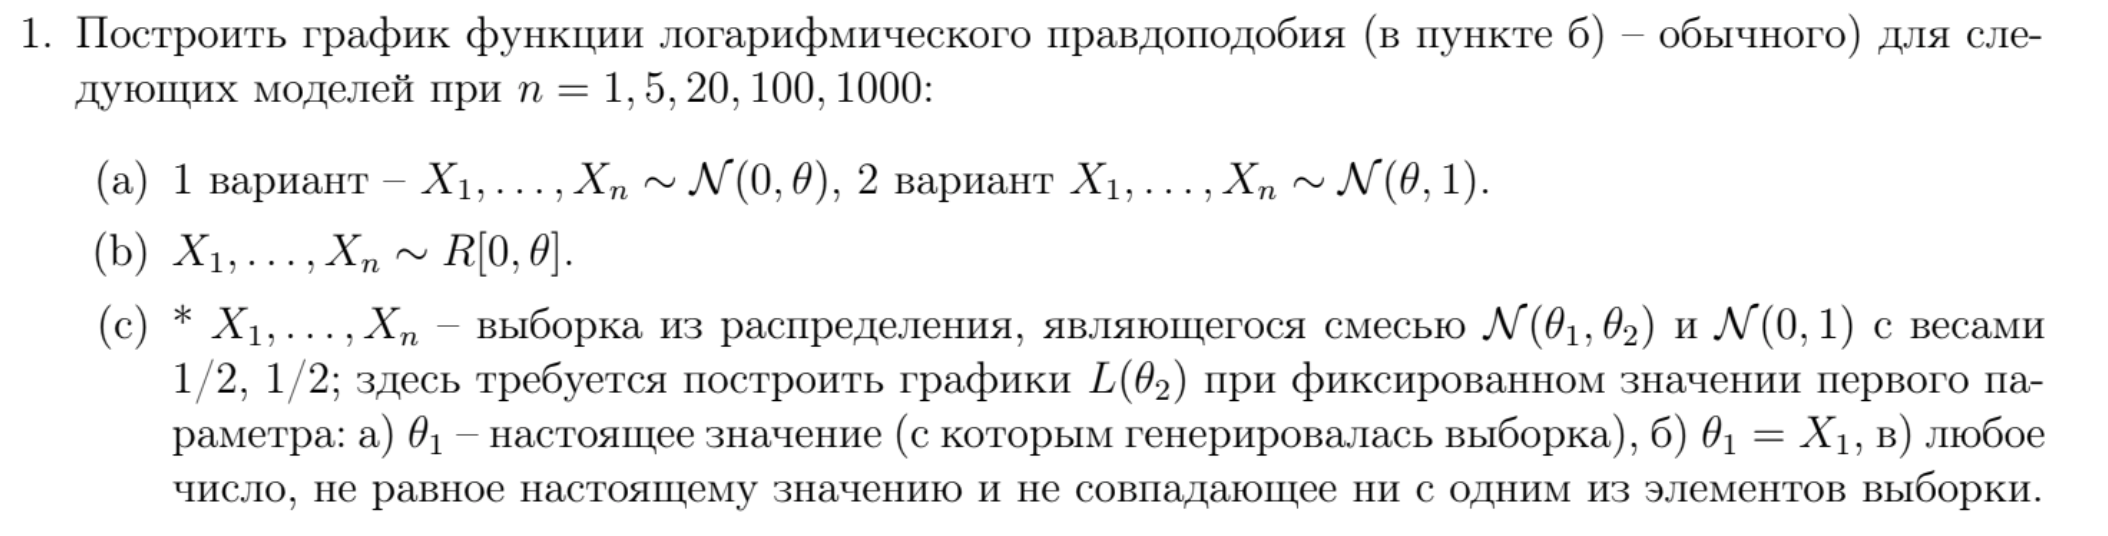

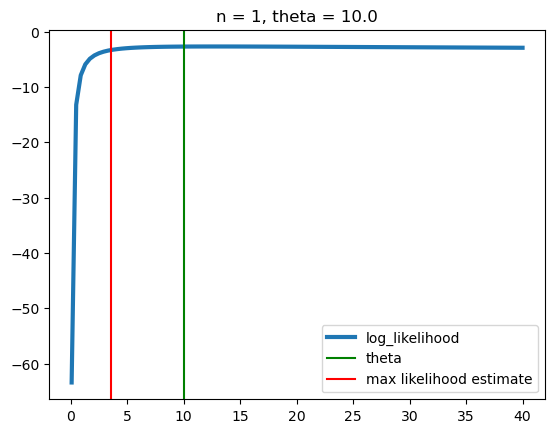

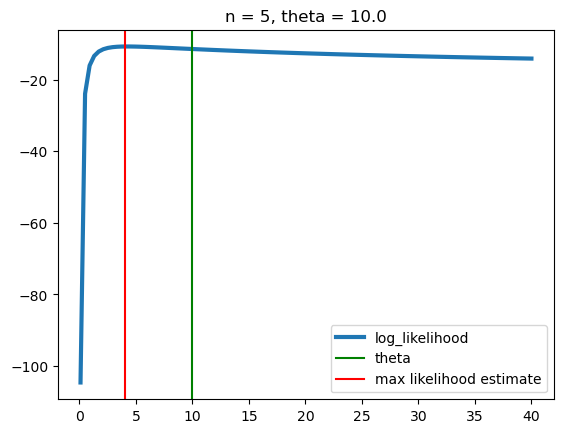

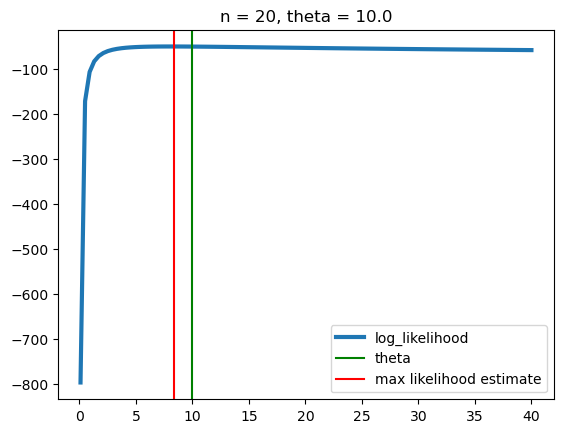

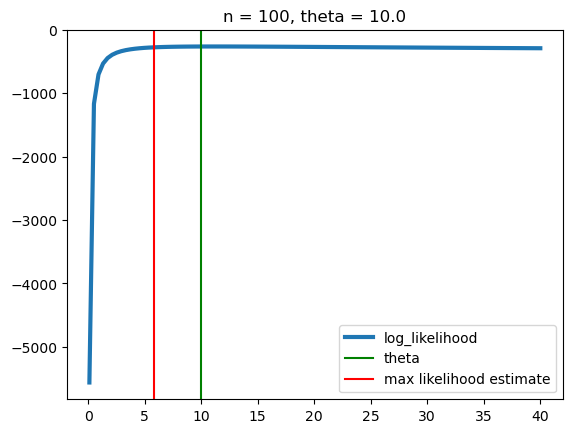

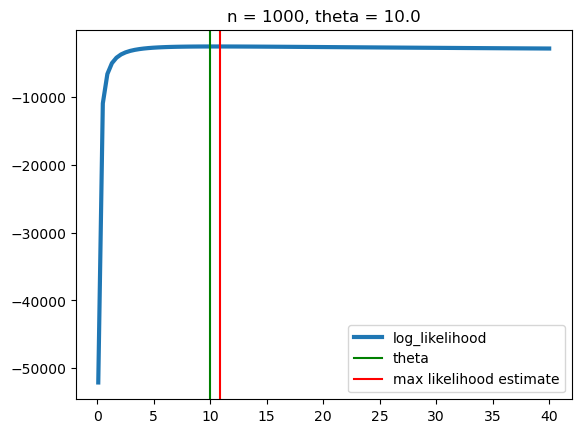

In [3]:
############## 1 вариант ################
N = [1,5,20,100,1000]
def task1a(n:int, theta:float):
    fig,ax = plt.subplots()
    theta_test = np.linspace(0.1,40,100)
    x_test = sts.norm.rvs(loc = 0, scale = np.sqrt(theta), size = n)
    plt.title("n = %d, theta = %0.1f"%(n,theta))
    log_likelihood = [sum(sts.norm.logpdf(x_test, scale = np.sqrt(theta))) for theta in theta_test]
    ax.plot(theta_test, log_likelihood , lw = 3, label ="log_likelihood")
    ax.axvline(theta, color = 'g', label = "theta")
    ax.axvline(np.max(x_test), color = 'r', label = "max likelihood estimate")
    ax.legend()
for n in N:
    task1a(n, 10)

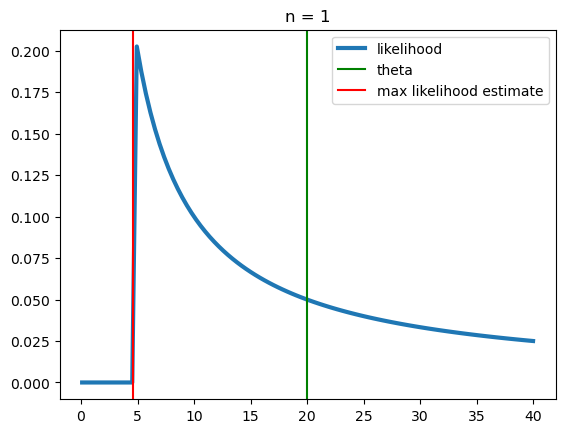

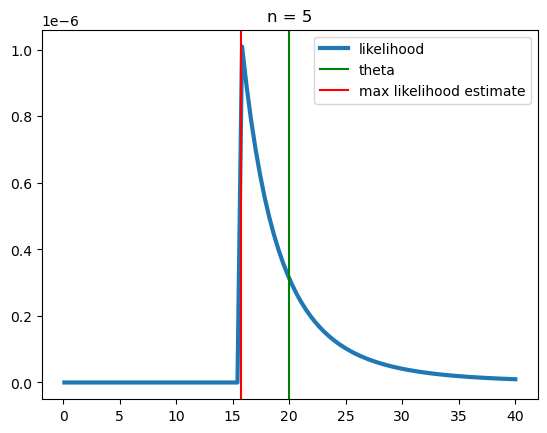

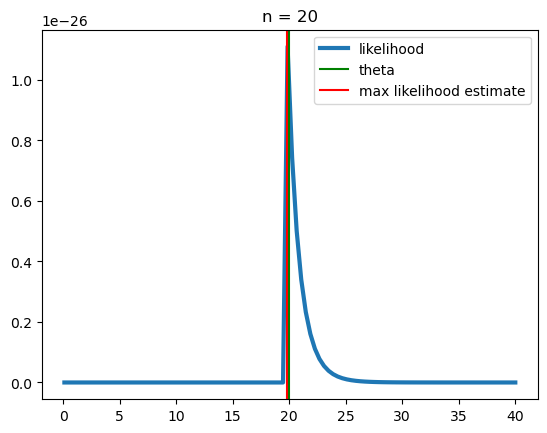

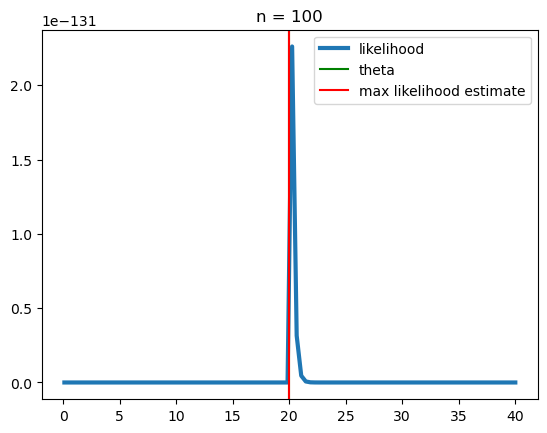

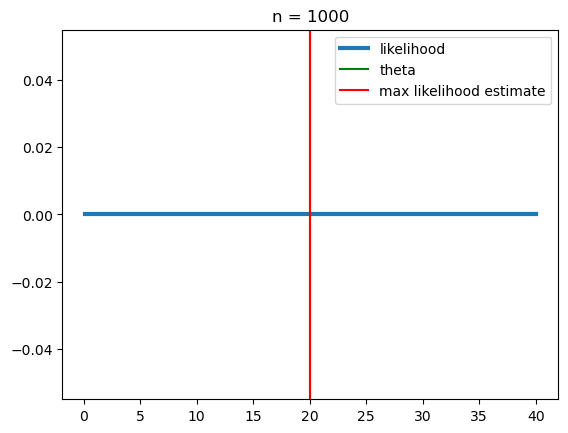

In [13]:
# N = [1,]
N = [1,5,20,100,1000]
def task1b(n:int, theta:float):
    fig,ax = plt.subplots()
    theta_test = np.linspace(0.1,40,100)
    x_test = sts.uniform.rvs(loc = 0, scale = theta, size = n)
    plt.title("n = %d"%n)
    likelihood = [np.prod(sts.uniform.pdf(x_test,loc=0, scale=theta)) for theta in theta_test]
    ax.plot(theta_test, likelihood, lw = 3, label ="likelihood")
    ax.axvline(theta, color = 'g', label = "theta")
    ax.axvline(np.max(x_test), color = 'r', label = "max likelihood estimate")
    ax.legend()
for n in N:
    task1b(n, 20)

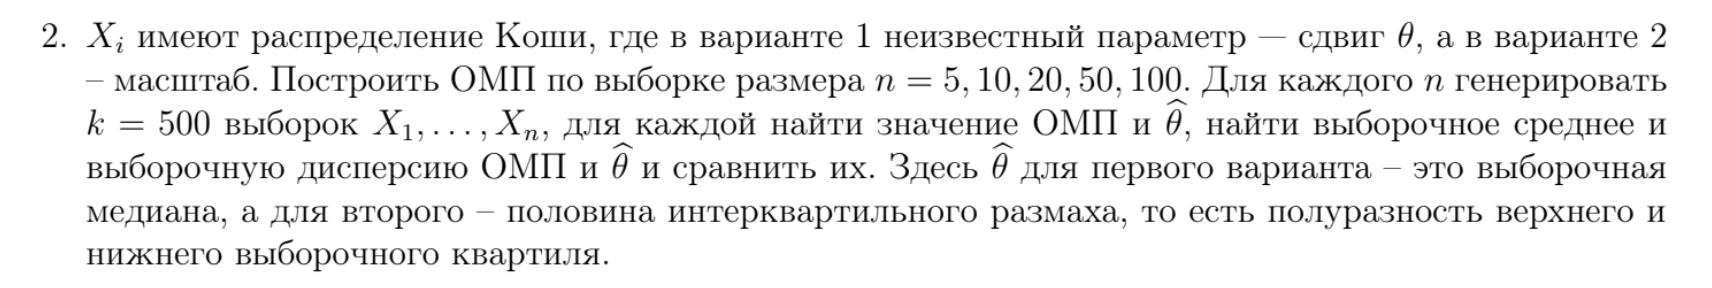

In [5]:
#*********
N = [5,10,20,50,100]

def f(x0, k, *values, b):
    lnL = k * (np.log(b) - np.log(np.pi))
    for i in range(k):
        lnL -= k * np.log((values[i] - x0)**2 + b**2)
    return -lnL

def task2(n:int,k:int, theta:float):
    rvs = sts.cauchy(loc = theta).rvs
    data = sc.sparse.random(k,n, density=1, data_rvs = rvs).toarray()
    MLE = []
    Median = []
    for i in range (k):
        loc,scale = sts.cauchy.fit(data[i][:], fscale = 1)
        MLE = np.append(MLE, loc)
        Median.append(np.median(data[i][:]))
    MED_Mean = np.mean(Median)
    MED_Var = np.var(Median)
    MLE_Mean = np.mean(MLE)
    MLE_Var = np.var(MLE)
    print("n =", n)
    print("Выборочное среднее MLE:",  MLE_Mean)
    print("Выборочное среднее MED:",  MED_Mean)
    print("Выборочная дисперсия MLE:",  MLE_Var)
    print("Выборочная дисперсия MED:",  MED_Var)
    print("")
for n in N:
    task2(n, 500,1)

n = 5
Выборочное среднее MLE: 0.9981644822631883
Выборочное среднее MED: 0.9736331170642655
Выборочная дисперсия MLE: 1.7652758726837006
Выборочная дисперсия MED: 1.841837145325835

n = 10
Выборочное среднее MLE: 0.9974062126614226
Выборочное среднее MED: 0.9991957732445038
Выборочная дисперсия MLE: 0.25026742272569663
Выборочная дисперсия MED: 0.33370582026956486

n = 20
Выборочное среднее MLE: 0.99849715461847
Выборочное среднее MED: 0.9885986662017963
Выборочная дисперсия MLE: 0.1183229291895441
Выборочная дисперсия MED: 0.14459470325111756

n = 50
Выборочное среднее MLE: 1.0007957291553693
Выборочное среднее MED: 1.0090221118874354
Выборочная дисперсия MLE: 0.03964826096425859
Выборочная дисперсия MED: 0.04716718701352804

n = 100
Выборочное среднее MLE: 0.9760846904627333
Выборочное среднее MED: 0.9803054808949061
Выборочная дисперсия MLE: 0.02096945666949678
Выборочная дисперсия MED: 0.02494950824195922



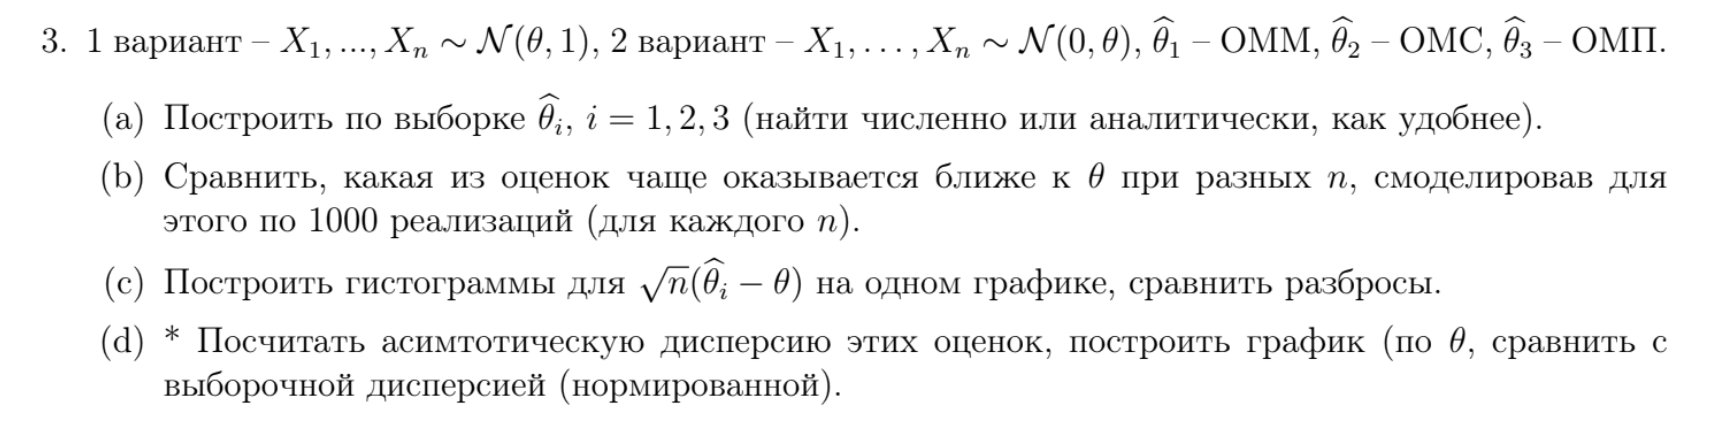

  0%|          | 0/3 [00:00<?, ?it/s]

n =  5
MSE is better than MLE in 28.000000000000004% of cases


 33%|███▎      | 1/3 [00:05<00:11,  5.93s/it]

n =  10
MSE is better than MLE in 11.0% of cases


 67%|██████▋   | 2/3 [00:16<00:08,  8.87s/it]

n =  20
MSE is better than MLE in 0.0% of cases


100%|██████████| 3/3 [00:37<00:00, 12.38s/it]


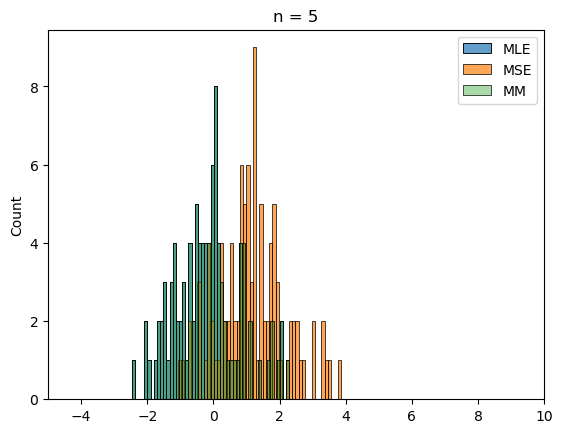

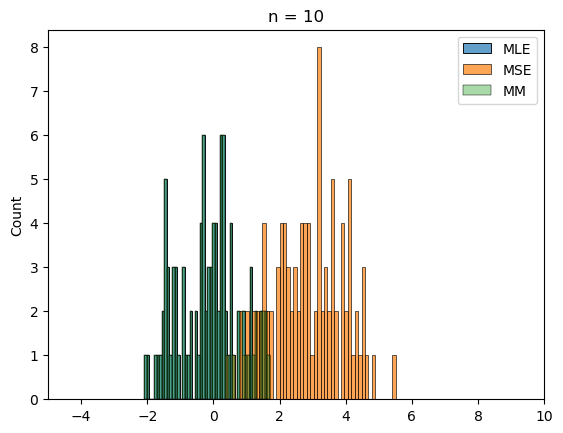

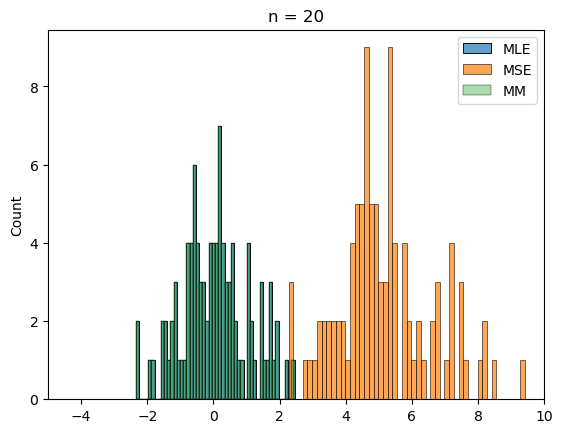

In [45]:
#********** ОМС
############## 1 вариант ################
N = [5,10,20]
import scipy

def D(x:float):
    D=sts.norm.cdf(data[0], loc=x, scale=1)
    for i in range(1, n):
        D*=(sts.norm.cdf(data[i], loc=x, scale=1) - sts.norm.cdf(data[i-1], loc=x, scale=1))
        D*=(1 - sts.norm.cdf(data[n-1], loc=x, scale=1))
    return D

'''def D(x_sorted:np.array, theta:float):
    F = sts.norm.cdf(x_sorted, loc = theta, scale = 1)
    F_diffed = np.diff(F)
    res = F[0]*(1 - F[n-1])*np.prod(F_diffed)
    return -res'''

def MSE(x:np.array, theta_test:np.array):
    x_sorted = np.sort(x)
    res = np.argmax([D(x_sorted, theta1) for theta1 in theta_test])
    return theta_test[res]
def MLE(x:np.array):
    loc, scale = sts.norm.fit(x, method='mle', fscale=1)
    return loc
def MM(x:np.array):
    loc, scale = sts.norm.fit(x, method='mm', fscale=1)
    return loc, scale
def calculate_task(n:int, k:int, theta:float):
    rvsNorm = sts.norm(loc = theta, scale = 1).rvs
    data = sc.sparse.random(k,n, density=1, data_rvs = rvsNorm).toarray()
    resMLE = []
    resMSE = []
    resMM = []
    theta_test = np.linspace(theta-1,theta+1,200)
    for i in range (k):
        resMLE = np.append(resMLE, MLE(data[i]))
        
        resMM = np.append(resMM, MM(data[i])[0])
        
        x_sorted = np.sort(data[i])
        def D(x):
            D=sts.norm.cdf(x_sorted[0], loc=x, scale=1)
            for i in range(1, n):
                D*=(sts.norm.cdf(x_sorted[i], loc=x, scale=1) - sts.norm.cdf(x_sorted[i-1], loc=x, scale=1))
                D*=(1 - sts.norm.cdf(x_sorted[n-1], loc=x, scale=1))
            return -D

        a, b = MM(data[i])
        res=scipy.optimize.minimize_scalar(D, (a, b))
        t2=res.x

        #resMSE = np.append(resMSE, MSE(data[i], theta_test))
        resMSE = np.append(resMSE, t2)
    return resMLE, resMSE, resMM
def task3(n:int,k:int, theta:float):
    fig,ax = plt.subplots()
    resMLE, resMSE, resMM = calculate_task(n,k,theta)
    plt.title("n = %d"%n)
    print("n = ", n)
    mles_dev = np.abs(resMLE - theta)
    mses_dev = np.abs(resMSE - theta)
    cmp = mses_dev < mles_dev
    print(f"MSE is better than MLE in {cmp.sum()/k * 100}% of cases")

    ax = sns.histplot(np.sqrt(n)*(np.array(resMLE)-theta), bins = 50,label = 'MLE', alpha = 0.7)
    ax = sns.histplot(np.sqrt(n)*(np.array(resMSE)-theta), bins = 50,label = 'MSE', alpha = 0.7)
    ax = sns.histplot(np.sqrt(n)*(np.array(resMM)-theta), bins = 50,label = 'MM', alpha = 0.4)

    ax.legend()
    plt.xlim(-5,10)
for n in tqdm(N):
    task3(n, 100,2)